In [2]:
import pandas as pd
import numpy as np

In [6]:
#%%timeit

step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data,name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


### Dont care about this giant test, is just to show an example of the %%timeit function

In [7]:
step_counts.index = pd.date_range('20190509',periods=len(step_counts))
print(step_counts)
print("\nImprimir o item com o indice 2019-05-09")
print(step_counts['2019-05-09'])

print("\nImprimir o item com o indice 3")
print(step_counts[3])

print(step_counts.astype(np.float64))

2019-05-09    3620
2019-05-10    7891
2019-05-11    9761
2019-05-12    3907
2019-05-13    4338
2019-05-14    5373
Freq: D, Name: steps, dtype: int64

Imprimir o item com o indice 2019-05-09
3620

Imprimir o item com o indice 3
3907
2019-05-09    3620.0
2019-05-10    7891.0
2019-05-11    9761.0
2019-05-12    3907.0
2019-05-13    4338.0
2019-05-14    5373.0
Freq: D, Name: steps, dtype: float64


### Cleaning data

In [8]:
old_step_counts = step_counts

step_counts[1:3] = np.NaN
print(step_counts)
print("\nOs dados limpos podem ser vistos a seguir:\n")
print(step_counts.fillna(0))

2019-05-09    3620.0
2019-05-10       NaN
2019-05-11       NaN
2019-05-12    3907.0
2019-05-13    4338.0
2019-05-14    5373.0
Freq: D, Name: steps, dtype: float64

Os dados limpos podem ser vistos a seguir:

2019-05-09    3620.0
2019-05-10       0.0
2019-05-11       0.0
2019-05-12    3907.0
2019-05-13    4338.0
2019-05-14    5373.0
Freq: D, Name: steps, dtype: float64


### Add data about cycling to a new Dataframe object

In [9]:
cycling_data = [10.7, None, 2.4, 15.3, 10.9, 0, None]
joined_data = list(zip(step_data, cycling_data))

activity_df = pd.DataFrame(joined_data)

print(activity_df)

      0     1
0  3620  10.7
1  7891   NaN
2  9761   2.4
3  3907  15.3
4  4338  10.9
5  5373   0.0


### A more elaborated example

In [10]:
activity_df = pd.DataFrame(joined_data, index = pd.date_range('20190509',periods=6), columns=['Walking','Cycling'])
activity_df.fillna(0.0,inplace=True)
print(activity_df)

            Walking  Cycling
2019-05-09     3620     10.7
2019-05-10     7891      0.0
2019-05-11     9761      2.4
2019-05-12     3907     15.3
2019-05-13     4338     10.9
2019-05-14     5373      0.0


### Indexing data

In [11]:
print("Indexing by Array index:")
print(activity_df.iloc[3])
print("\nIndexing by DataFrame index:")
print(activity_df.loc['2019-05-12'])

print("\nIndexing by Columns:")
print(activity_df['Walking'])

print("\nIndexing by Columns in an object oriented way:")
print(activity_df.Walking)

print("\nIndexing Columns by index:")
print(activity_df.iloc[:,1])

Indexing by Array index:
Walking    3907.0
Cycling      15.3
Name: 2019-05-12 00:00:00, dtype: float64

Indexing by DataFrame index:
Walking    3907.0
Cycling      15.3
Name: 2019-05-12 00:00:00, dtype: float64

Indexing by Columns:
2019-05-09    3620
2019-05-10    7891
2019-05-11    9761
2019-05-12    3907
2019-05-13    4338
2019-05-14    5373
Freq: D, Name: Walking, dtype: int64

Indexing by Columns in an object oriented way:
2019-05-09    3620
2019-05-10    7891
2019-05-11    9761
2019-05-12    3907
2019-05-13    4338
2019-05-14    5373
Freq: D, Name: Walking, dtype: int64

Indexing Columns by index:
2019-05-09    10.7
2019-05-10     0.0
2019-05-11     2.4
2019-05-12    15.3
2019-05-13    10.9
2019-05-14     0.0
Freq: D, Name: Cycling, dtype: float64


### Reading example data

In [12]:
data = pd.read_csv("./Iris_Data.csv")

In [20]:
data.iloc[2]
print("\nIntroduction to the data with the head method:")
print(data.head())

print("\nCreate a new Column based on other two columns\n")

data["sepal_area"] = data.sepal_length * data.sepal_width
print(data.head())
print(data.iloc[3:,-3:])


Introduction to the data with the head method:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   sepal_area  
0       17.85  
1       14.70  
2       15.04  
3       14.26  
4       18.00  

Create a new Column based on other two columns

   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.

### Applying a function to a Dataframe Column

In [22]:
data['abbrev'] = (data.species.apply(lambda x: x.replace('Iris-','')))
print(data['abbrev'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: abbrev, Length: 150, dtype: object


### Concatenating two Dataframes

In [24]:
portion_of_data = pd.concat([data.iloc[:2],data.iloc[-2:]])
print(portion_of_data)

     sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     sepal_area     abbrev  
0         17.85     setosa  
1         14.70     setosa  
148       21.08  virginica  
149       17.70  virginica  


### Aggregating data with GroupBy

In [26]:
group_sizes = (data.groupby('species').size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### More statistical data

In [39]:
print(data.mean())

print("\nDescricao completa:", data.describe(), sep='\n')

print("\nStandard deviation:",data.std(), 
      "Variance:", data.var(), 
      "Unbiased standard error of the mean:",data.sem(), 
      sep = "\n\n")


sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64

Descricao completa:
       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000

Standard deviation:

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
sepal_area      3.368693
dtype: float64

Variance:

sepal_length

### Getting data Samples:

In [40]:
sample = (data.sample(n=5, replace=False,random_state=42))

print(sample)

     sepal_length  sepal_width  petal_length  petal_width          species  \
73            6.1          2.8           4.7          1.2  Iris-versicolor   
18            5.7          3.8           1.7          0.3      Iris-setosa   
118           7.7          2.6           6.9          2.3   Iris-virginica   
78            6.0          2.9           4.5          1.5  Iris-versicolor   
76            6.8          2.8           4.8          1.4  Iris-versicolor   

     sepal_area      abbrev  
73        17.08  versicolor  
18        21.66      setosa  
118       20.02   virginica  
78        17.40  versicolor  
76        19.04  versicolor  


### Plotting and generating visual feedback of the data

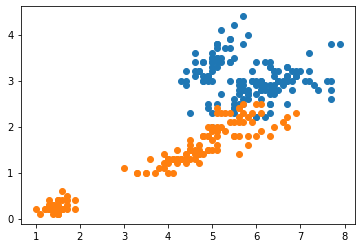

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(data.sepal_length,data.sepal_width,ls ='', marker = 'o', label = 'sepal')

plt.plot(data.petal_length,data.petal_width,ls ='', marker = 'o', label = 'petal')



(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <a list of 25 Patch objects>)

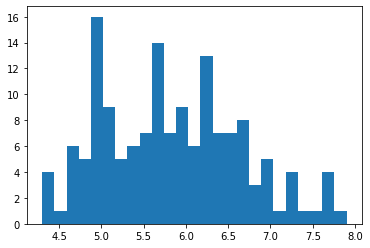

In [49]:
plt.hist(data.sepal_length, bins = 25)

[Text(0, 0.5, 'ylabel'), Text(0.5, 0, 'xlabel'), Text(0.5, 1.0, 'Title')]

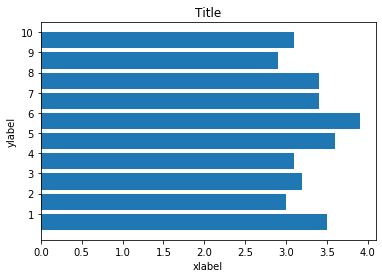

In [54]:
fig, ax = plt.subplots()
ax.barh(np.arange(10), data.sepal_width.iloc[:10])

# Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0)) 
ax.set_yticklabels(np.arange(1,11)) 
ax.set(xlabel='xlabel', ylabel='ylabel', title='Title')

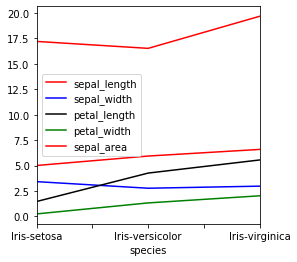

In [56]:
(data.groupby('species').mean().plot(color=['red','blue','black','green'],fontsize=10.0, figsize=(4,4)))

In [57]:
import seaborn as sns

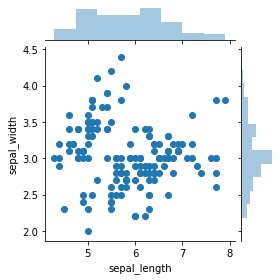

In [60]:
sns.jointplot(x='sepal_length',
              y='sepal_width',
              data=data, height=4)

### OK.. Seaborn is really amazing!

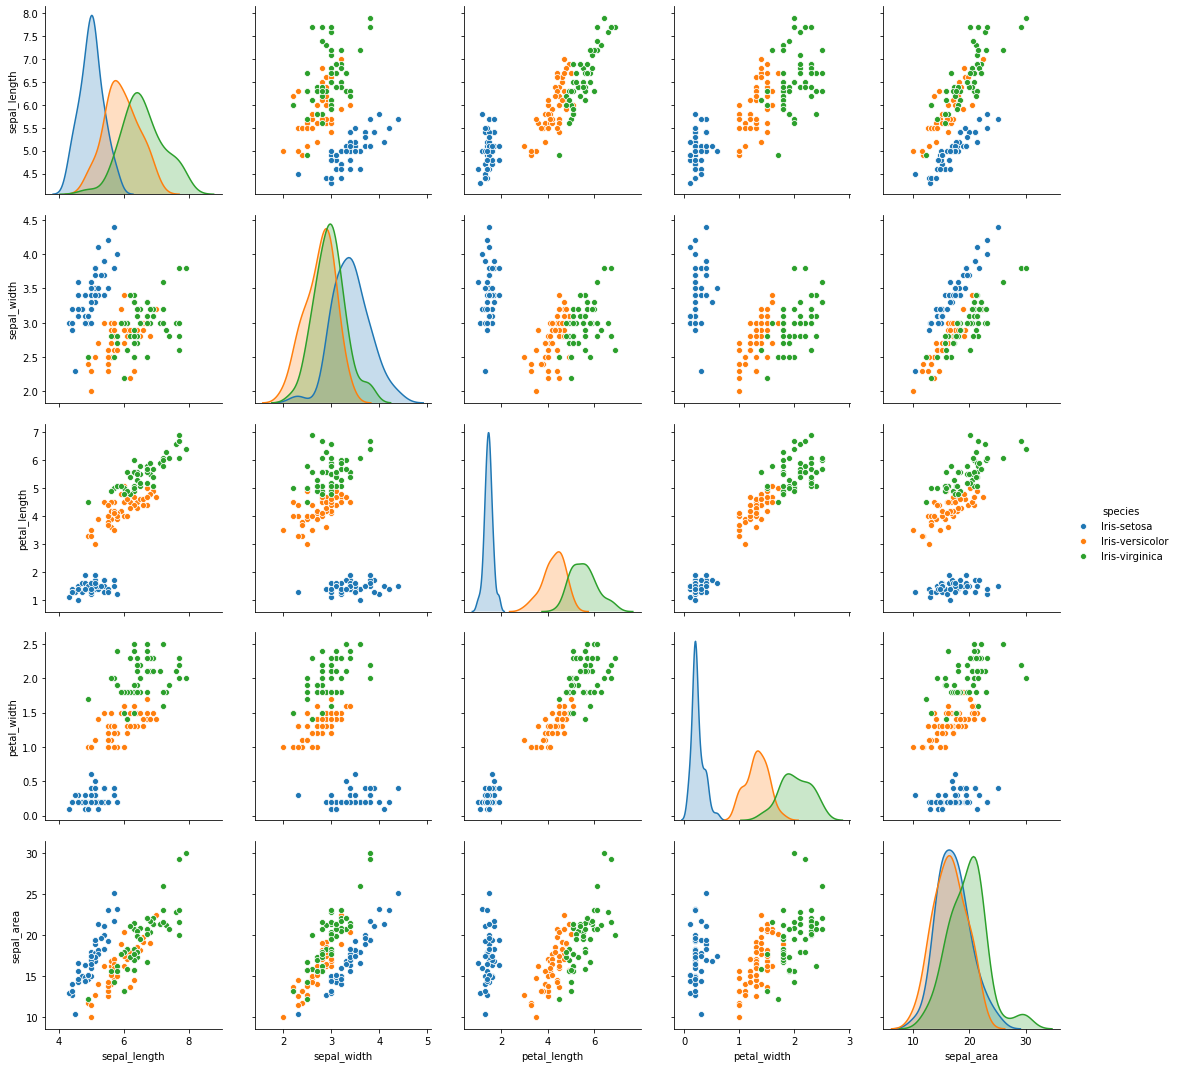

In [62]:
sns.pairplot(data, hue='species', height=3)